# 机器学习之特征降维

PCA 解释的方差比例: [0.24420856 0.19318526]

PCA 主成分矩阵:
         Area     Rooms     Floor  YearBuilt  GreenRate  Transport
PC1 -0.420517 -0.050258 -0.446433  -0.018233  -0.497788    0.61091
PC2 -0.319327  0.244490  0.553416   0.705264  -0.159312    0.09596


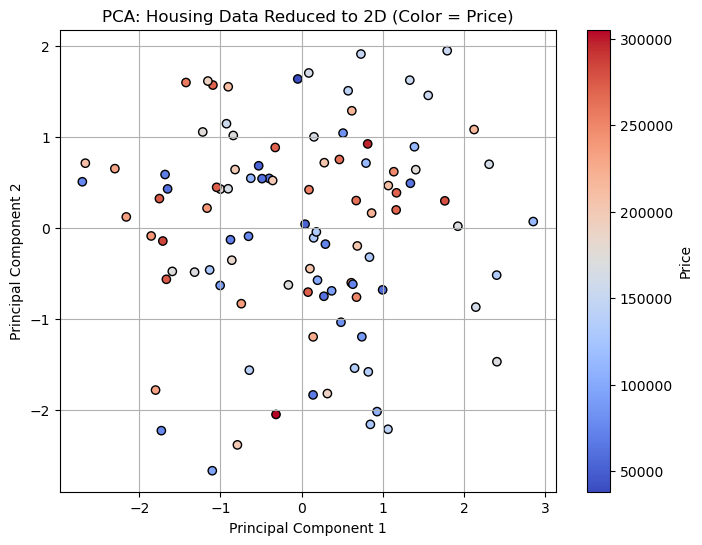

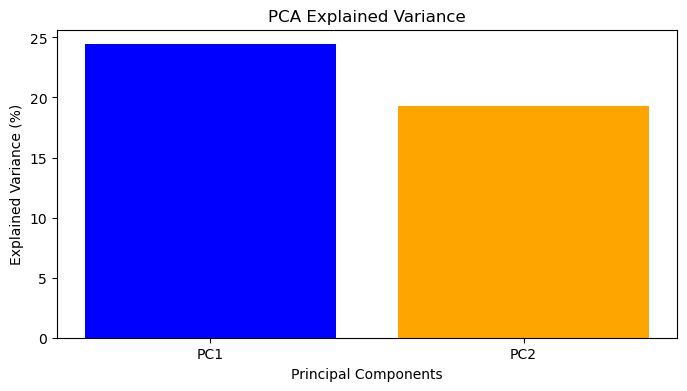

        PC1       PC2   Price
0 -1.001559  0.426238  178491
1  0.087774  1.702566  162379
2 -0.047981  1.636675   38124
3  0.316674 -1.820994  189381
4 -0.325925  0.883606  270014


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 生成模拟房价数据（假设有 6 个特征）
np.random.seed(42)
data = {
    'Area': np.random.randint(50, 200, 100),         # 房屋面积（平方米）
    'Rooms': np.random.randint(1, 6, 100),           # 房间数量
    'Floor': np.random.randint(1, 30, 100),          # 楼层
    'YearBuilt': np.random.randint(1980, 2022, 100), # 建成年份
    'GreenRate': np.random.uniform(0.1, 0.8, 100),   # 绿化率
    'Transport': np.random.randint(1, 10, 100)       # 交通便利性（评分 1-10）
}
df = pd.DataFrame(data)

# 添加模拟房价（目标变量，仅用于可视化）
df['Price'] = df['Area'] * 300 + df['Rooms'] * 50000 - df['Floor'] * 1000 + np.random.randint(-5000, 5000, 100)

# 标准化数据（PCA 受量纲影响）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Price']))

# 使用 PCA 降维到 2 维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 查看主成分贡献度
explained_variance = pca.explained_variance_ratio_
print("PCA 解释的方差比例:", explained_variance)

# 查看主成分与原始特征的关系
components = pd.DataFrame(pca.components_, columns=df.drop(columns=['Price']).columns, index=['PC1', 'PC2'])
print("\nPCA 主成分矩阵:")
print(components)

# 可视化降维后的数据，颜色表示房价
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Price'], cmap='coolwarm', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Housing Data Reduced to 2D (Color = Price)')
plt.colorbar(scatter, label="Price")
plt.grid(True)
plt.show()

# 可视化主成分贡献度
plt.figure(figsize=(8, 4))
plt.bar(['PC1', 'PC2'], explained_variance * 100, color=['blue', 'orange'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('PCA Explained Variance')
plt.show()

# 输出降维后的数据前 5 行
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Price'] = df['Price']
print(pca_df.head())